In [4]:
from keras import layers
from keras import models
from keras import optimizers
from keras.layers import GlobalAveragePooling2D


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(GlobalAveragePooling2D())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = 'Downloads/baby/train'
validation_dir = 'Downloads/baby/validation'

# rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # directory
        train_dir,
        # resized to 150x150
        target_size=(150, 150),
        batch_size=50,
        # binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=50,
        class_mode='binary')

Found 8900 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [8]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=178,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/100
178/178 [==============================] - 239s 1s/step - loss: 0.6939 - acc: 0.5062 - val_loss: 0.6926 - val_acc: 0.5350
Epoch 2/100
178/178 [==============================] - 243s 1s/step - loss: 0.6932 - acc: 0.5129 - val_loss: 0.6921 - val_acc: 0.5213
Epoch 3/100
178/178 [==============================] - 244s 1s/step - loss: 0.6924 - acc: 0.5183 - val_loss: 0.6905 - val_acc: 0.5712
Epoch 4/100
178/178 [==============================] - 247s 1s/step - loss: 0.6910 - acc: 0.5320 - val_loss: 0.6878 - val_acc: 0.5438
Epoch 5/100
178/178 [==============================] - 245s 1s/step - loss: 0.6908 - acc: 0.5256 - val_loss: 0.6892 - val_acc: 0.5275
Epoch 6/100
178/178 [==============================] - 253s 1s/step - loss: 0.6904 - acc: 0.5374 - val_loss: 0.6891 - val_acc: 0.5587
Epoch 7/100
178/178 [==============================] - 254s 1s/step - loss: 0.6906 - acc: 0.5289 - val_loss: 0.6855 - val_acc: 0.5450
Epoch 8/100
178/178 [==============================] - 252s 1s

Epoch 62/100
178/178 [==============================] - 254s 1s/step - loss: 0.6591 - acc: 0.6003 - val_loss: 0.6679 - val_acc: 0.5938
Epoch 63/100
178/178 [==============================] - 257s 1s/step - loss: 0.6617 - acc: 0.6020 - val_loss: 0.6690 - val_acc: 0.6150
Epoch 64/100
178/178 [==============================] - 263s 1s/step - loss: 0.6666 - acc: 0.5890 - val_loss: 0.6459 - val_acc: 0.6137
Epoch 65/100
178/178 [==============================] - 259s 1s/step - loss: 0.6512 - acc: 0.6213 - val_loss: 0.6552 - val_acc: 0.6162
Epoch 66/100
178/178 [==============================] - 262s 1s/step - loss: 0.6587 - acc: 0.6014 - val_loss: 0.6508 - val_acc: 0.6212
Epoch 67/100
178/178 [==============================] - 258s 1s/step - loss: 0.6585 - acc: 0.5913 - val_loss: 0.6516 - val_acc: 0.6125
Epoch 68/100
178/178 [==============================] - 260s 1s/step - loss: 0.6546 - acc: 0.6185 - val_loss: 0.6434 - val_acc: 0.6363
Epoch 69/100
178/178 [==============================] -

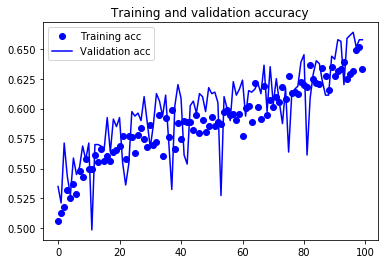

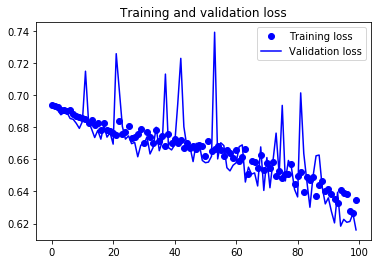

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

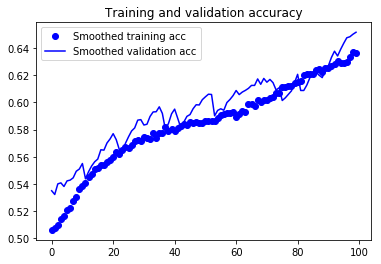

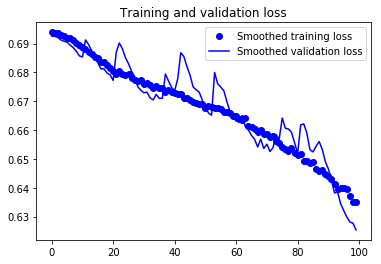

In [11]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
model.save('baby_100')

In [3]:
from keras.models import load_model

model = load_model('baby_100')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = 'Downloads/baby/train'
validation_dir = 'Downloads/baby/validation'


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=50,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=50,
        class_mode='binary')

Found 8900 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [5]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=178,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/100
178/178 [==============================] - 649s 4s/step - loss: 0.6224 - acc: 0.6493 - val_loss: 0.6120 - val_acc: 0.6680
Epoch 2/100
178/178 [==============================] - 617s 3s/step - loss: 0.6214 - acc: 0.6542 - val_loss: 0.6594 - val_acc: 0.6135
Epoch 3/100
178/178 [==============================] - 612s 3s/step - loss: 0.6179 - acc: 0.6478 - val_loss: 0.6103 - val_acc: 0.6630
Epoch 4/100
178/178 [==============================] - 617s 3s/step - loss: 0.6155 - acc: 0.6584 - val_loss: 0.5985 - val_acc: 0.6845
Epoch 5/100
178/178 [==============================] - 610s 3s/step - loss: 0.6146 - acc: 0.6579 - val_loss: 0.6276 - val_acc: 0.6480
Epoch 6/100
178/178 [==============================] - 609s 3s/step - loss: 0.6119 - acc: 0.6635 - val_loss: 0.5965 - val_acc: 0.6805
Epoch 7/100
178/178 [==============================] - 713s 4s/step - loss: 0.6102 - acc: 0.6643 - val_loss: 0.6093 - val_acc: 0.6660
Epoch 8/100
178/178 [==============================] - 609s 3s

Epoch 62/100
178/178 [==============================] - 640s 4s/step - loss: 0.5104 - acc: 0.7425 - val_loss: 0.5319 - val_acc: 0.7260
Epoch 63/100
178/178 [==============================] - 644s 4s/step - loss: 0.5110 - acc: 0.7407 - val_loss: 0.5265 - val_acc: 0.7220
Epoch 64/100
178/178 [==============================] - 642s 4s/step - loss: 0.5074 - acc: 0.7429 - val_loss: 0.5598 - val_acc: 0.7065
Epoch 65/100
178/178 [==============================] - 640s 4s/step - loss: 0.5074 - acc: 0.7467 - val_loss: 0.4962 - val_acc: 0.7585
Epoch 66/100
178/178 [==============================] - 643s 4s/step - loss: 0.5059 - acc: 0.7484 - val_loss: 0.5006 - val_acc: 0.7425
Epoch 67/100
178/178 [==============================] - 636s 4s/step - loss: 0.5052 - acc: 0.7467 - val_loss: 0.4918 - val_acc: 0.7585
Epoch 68/100
178/178 [==============================] - 651s 4s/step - loss: 0.4999 - acc: 0.7545 - val_loss: 0.5249 - val_acc: 0.7380
Epoch 69/100
178/178 [==============================] -

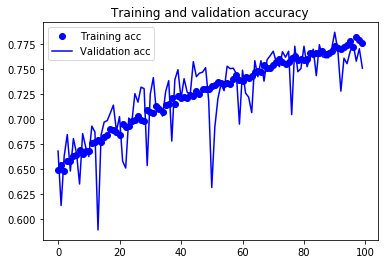

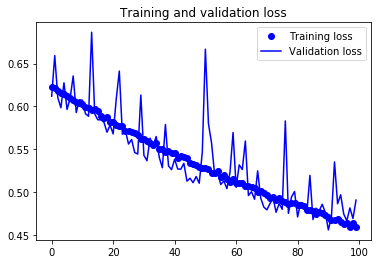

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

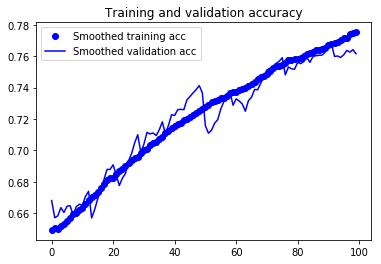

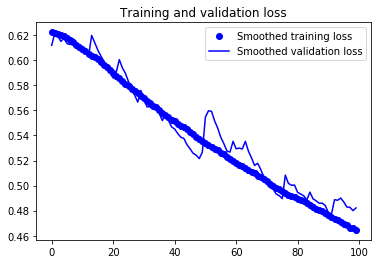

In [8]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
model.save('baby_200')

In [1]:
from keras.models import load_model

model = load_model('baby_200')
model.summary()

C:\Users\apple\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
con

In [2]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = 'Downloads/baby/train'
validation_dir = 'Downloads/baby/validation'


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=50,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=50,
        class_mode='binary')

Found 8900 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [3]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=178,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/100
178/178 [==============================] - 732s 4s/step - loss: 0.4593 - acc: 0.7763 - val_loss: 0.4671 - val_acc: 0.7695
Epoch 2/100
178/178 [==============================] - 598s 3s/step - loss: 0.4576 - acc: 0.7788 - val_loss: 0.4934 - val_acc: 0.7635
Epoch 3/100
178/178 [==============================] - 603s 3s/step - loss: 0.4533 - acc: 0.7836 - val_loss: 0.5054 - val_acc: 0.7525
Epoch 4/100
178/178 [==============================] - 606s 3s/step - loss: 0.4550 - acc: 0.7790 - val_loss: 0.4822 - val_acc: 0.7640
Epoch 5/100
178/178 [==============================] - 603s 3s/step - loss: 0.4516 - acc: 0.7791 - val_loss: 0.4850 - val_acc: 0.7610
Epoch 6/100
178/178 [==============================] - 2017s 11s/step - loss: 0.4464 - acc: 0.7862 - val_loss: 0.5177 - val_acc: 0.7360
Epoch 7/100
178/178 [==============================] - 641s 4s/step - loss: 0.4526 - acc: 0.7847 - val_loss: 0.4580 - val_acc: 0.7740
Epoch 8/100
178/178 [==============================] - 624s 

Epoch 62/100
178/178 [==============================] - 632s 4s/step - loss: 0.3881 - acc: 0.8207 - val_loss: 0.4283 - val_acc: 0.8040
Epoch 63/100
178/178 [==============================] - 636s 4s/step - loss: 0.3816 - acc: 0.8281 - val_loss: 0.4241 - val_acc: 0.8035
Epoch 64/100
178/178 [==============================] - 634s 4s/step - loss: 0.3866 - acc: 0.8249 - val_loss: 0.4979 - val_acc: 0.7575
Epoch 65/100
178/178 [==============================] - 650s 4s/step - loss: 0.3861 - acc: 0.8182 - val_loss: 0.4423 - val_acc: 0.7875
Epoch 66/100
178/178 [==============================] - 651s 4s/step - loss: 0.3837 - acc: 0.8203 - val_loss: 0.4252 - val_acc: 0.8085
Epoch 67/100
178/178 [==============================] - 654s 4s/step - loss: 0.3823 - acc: 0.8262 - val_loss: 0.4246 - val_acc: 0.8025
Epoch 68/100
178/178 [==============================] - 654s 4s/step - loss: 0.3826 - acc: 0.8263 - val_loss: 0.4231 - val_acc: 0.7990
Epoch 69/100
178/178 [==============================] -

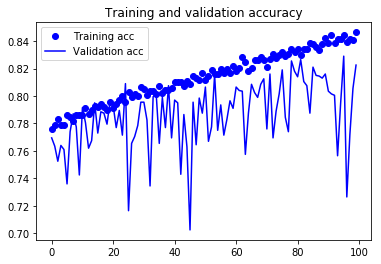

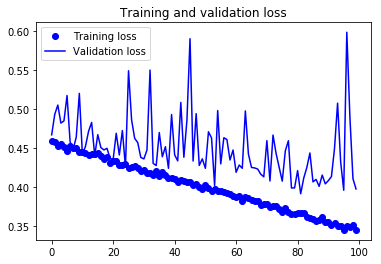

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

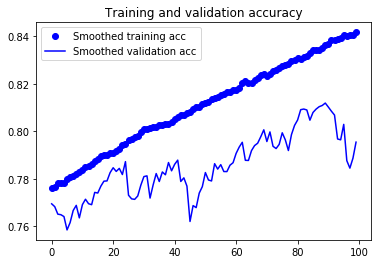

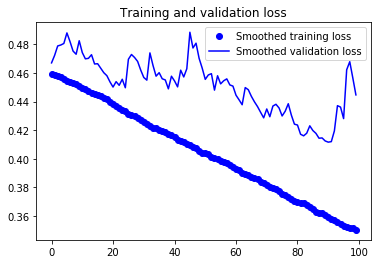

In [10]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
model.save('baby_300')

In [27]:
from keras.models import load_model

model = load_model('baby_300')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [28]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# the validation data should NOT be augmented
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=80,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=80,
        class_mode='binary')


Found 8900 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [29]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=178,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/100
178/178 [==============================] - 1064s 6s/step - loss: 0.5323 - acc: 0.7270 - val_loss: 0.4013 - val_acc: 0.8244
Epoch 2/100
178/178 [==============================] - 1061s 6s/step - loss: 0.5163 - acc: 0.7382 - val_loss: 0.3969 - val_acc: 0.8209
Epoch 3/100
178/178 [==============================] - 1046s 6s/step - loss: 0.5135 - acc: 0.7368 - val_loss: 0.3838 - val_acc: 0.8259
Epoch 4/100
178/178 [==============================] - 1049s 6s/step - loss: 0.5117 - acc: 0.7365 - val_loss: 0.4187 - val_acc: 0.7975
Epoch 5/100
178/178 [==============================] - 1050s 6s/step - loss: 0.5118 - acc: 0.7451 - val_loss: 0.4162 - val_acc: 0.7975
Epoch 6/100
178/178 [==============================] - 1053s 6s/step - loss: 0.5067 - acc: 0.7456 - val_loss: 0.3948 - val_acc: 0.8228
Epoch 7/100
178/178 [==============================] - 1063s 6s/step - loss: 0.5060 - acc: 0.7481 - val_loss: 0.4316 - val_acc: 0.7809
Epoch 8/100
178/178 [==============================] - 

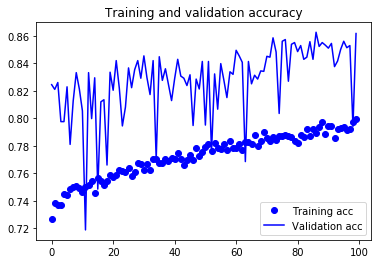

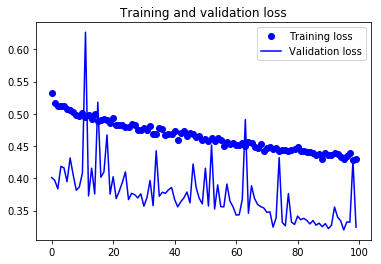

In [31]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

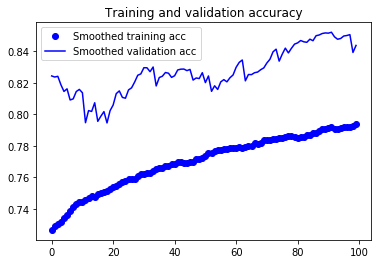

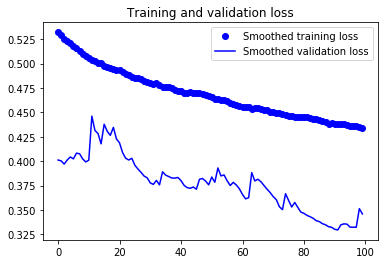

In [32]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [30]:
model.save('baby_400')

In [36]:
from keras.models import load_model

model = load_model('baby_400')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [37]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=80,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=80,
        class_mode='binary')


Found 8900 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [38]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=178,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/100
178/178 [==============================] - 1070s 6s/step - loss: 0.4345 - acc: 0.7909 - val_loss: 0.3582 - val_acc: 0.8366
Epoch 2/100
178/178 [==============================] - 1035s 6s/step - loss: 0.4281 - acc: 0.7956 - val_loss: 0.3371 - val_acc: 0.8344
Epoch 3/100
178/178 [==============================] - 1055s 6s/step - loss: 0.4271 - acc: 0.7999 - val_loss: 0.3189 - val_acc: 0.8569
Epoch 4/100
178/178 [==============================] - 1048s 6s/step - loss: 0.4301 - acc: 0.7958 - val_loss: 0.3672 - val_acc: 0.8356
Epoch 5/100
178/178 [==============================] - 1046s 6s/step - loss: 0.4265 - acc: 0.7940 - val_loss: 0.3269 - val_acc: 0.8438
Epoch 6/100
178/178 [==============================] - 1047s 6s/step - loss: 0.4256 - acc: 0.7946 - val_loss: 0.3294 - val_acc: 0.8541
Epoch 7/100
178/178 [==============================] - 1045s 6s/step - loss: 0.4340 - acc: 0.7946 - val_loss: 0.3287 - val_acc: 0.8481
Epoch 8/100
178/178 [==============================] - 

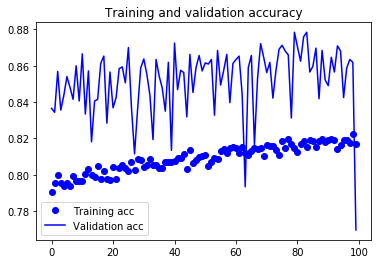

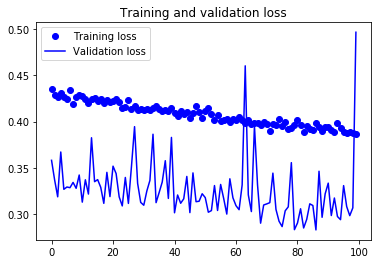

In [39]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

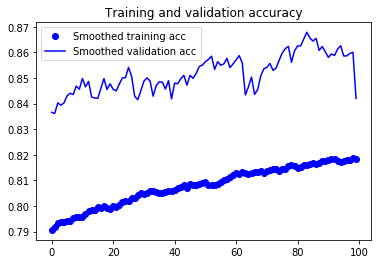

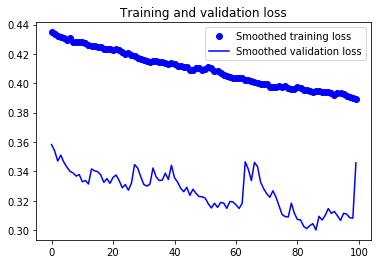

In [40]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [41]:
model.save('baby_500')

In [42]:
from keras.models import load_model

model = load_model('baby_500')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [43]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=80,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=80,
        class_mode='binary')


Found 8900 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [44]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=178,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/20
178/178 [==============================] - 1054s 6s/step - loss: 0.3346 - acc: 0.8549 - val_loss: 0.3665 - val_acc: 0.8278
Epoch 2/20
178/178 [==============================] - 1045s 6s/step - loss: 0.3323 - acc: 0.8518 - val_loss: 0.3066 - val_acc: 0.8631
Epoch 3/20
178/178 [==============================] - 1046s 6s/step - loss: 0.3312 - acc: 0.8547 - val_loss: 0.2861 - val_acc: 0.8778
Epoch 4/20
178/178 [==============================] - 1041s 6s/step - loss: 0.3314 - acc: 0.8553 - val_loss: 0.4071 - val_acc: 0.8100
Epoch 5/20
178/178 [==============================] - 1059s 6s/step - loss: 0.3310 - acc: 0.8565 - val_loss: 0.2879 - val_acc: 0.8775
Epoch 6/20
178/178 [==============================] - 1084s 6s/step - loss: 0.3312 - acc: 0.8508 - val_loss: 0.3339 - val_acc: 0.8484
Epoch 7/20
178/178 [==============================] - 1065s 6s/step - loss: 0.3260 - acc: 0.8557 - val_loss: 0.2991 - val_acc: 0.8697
Epoch 8/20
178/178 [==============================] - 1076s 6s

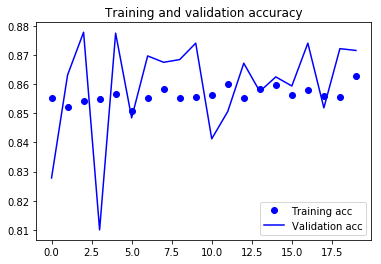

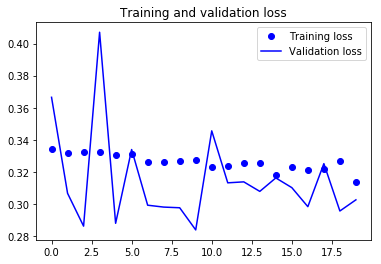

In [45]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

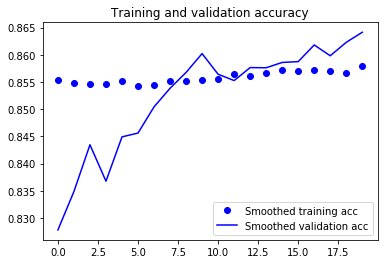

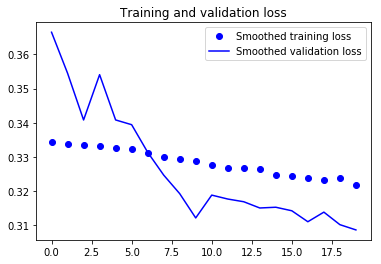

In [46]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [47]:
model.save('baby_520')

In [1]:
from keras.models import load_model

model = load_model('baby_520')
model.summary()

C:\Users\apple\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
con

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = 'Downloads/baby/train'
validation_dir = 'Downloads/baby/validation'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=80,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=80,
        class_mode='binary')


Found 9750 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [4]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=195,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/10
195/195 [==============================] - 1203s 6s/step - loss: 0.3235 - acc: 0.8571 - val_loss: 0.3201 - val_acc: 0.8550
Epoch 2/10
195/195 [==============================] - 1134s 6s/step - loss: 0.3237 - acc: 0.8600 - val_loss: 0.2802 - val_acc: 0.8734
Epoch 3/10
195/195 [==============================] - 1112s 6s/step - loss: 0.3240 - acc: 0.8566 - val_loss: 0.2963 - val_acc: 0.8638
Epoch 4/10
195/195 [==============================] - 1123s 6s/step - loss: 0.3171 - acc: 0.8583 - val_loss: 0.2851 - val_acc: 0.8728
Epoch 5/10
195/195 [==============================] - 1107s 6s/step - loss: 0.3213 - acc: 0.8604 - val_loss: 0.3013 - val_acc: 0.8622
Epoch 6/10
195/195 [==============================] - 1121s 6s/step - loss: 0.3179 - acc: 0.8570 - val_loss: 0.3144 - val_acc: 0.8600
Epoch 7/10
195/195 [==============================] - 1099s 6s/step - loss: 0.3140 - acc: 0.8591 - val_loss: 0.2878 - val_acc: 0.8766
Epoch 8/10
195/195 [==============================] - 1100s 6s

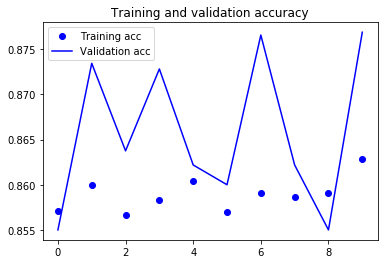

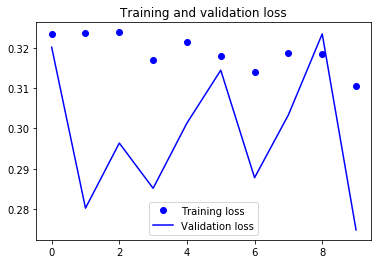

In [6]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

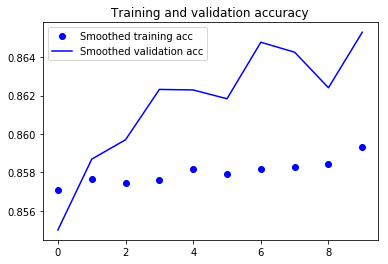

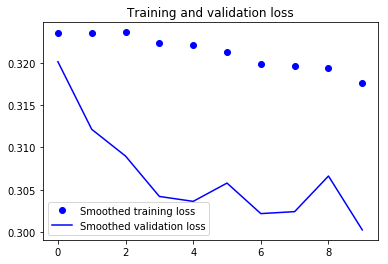

In [7]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [8]:
model.save('baby_530')

In [3]:
from keras.models import load_model

model = load_model('baby_530')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = 'Downloads/baby/train'
validation_dir = 'Downloads/baby/validation'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=60,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=80,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=80,
        class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [5]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=200,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=40)

Epoch 1/20
200/200 [==============================] - 1271s 6s/step - loss: 0.4696 - acc: 0.7674 - val_loss: 0.2960 - val_acc: 0.8722
Epoch 2/20
200/200 [==============================] - 1246s 6s/step - loss: 0.4695 - acc: 0.7671 - val_loss: 0.2975 - val_acc: 0.8575
Epoch 3/20
200/200 [==============================] - 1195s 6s/step - loss: 0.4565 - acc: 0.7739 - val_loss: 0.3120 - val_acc: 0.8503
Epoch 4/20
200/200 [==============================] - 1190s 6s/step - loss: 0.4598 - acc: 0.7721 - val_loss: 0.2930 - val_acc: 0.8678
Epoch 5/20
200/200 [==============================] - 1175s 6s/step - loss: 0.4574 - acc: 0.7759 - val_loss: 0.2893 - val_acc: 0.8809
Epoch 6/20
200/200 [==============================] - 1174s 6s/step - loss: 0.4558 - acc: 0.7742 - val_loss: 0.3272 - val_acc: 0.8400
Epoch 7/20
200/200 [==============================] - 1182s 6s/step - loss: 0.4557 - acc: 0.7756 - val_loss: 0.2765 - val_acc: 0.8750
Epoch 8/20
200/200 [==============================] - 1172s 6s

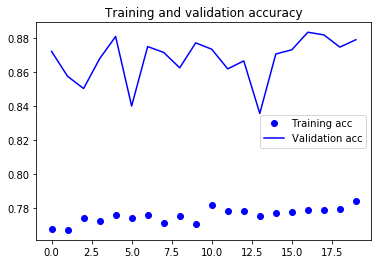

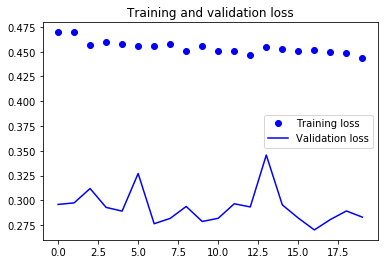

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

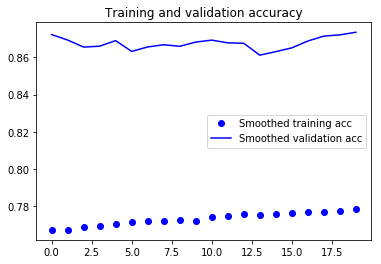

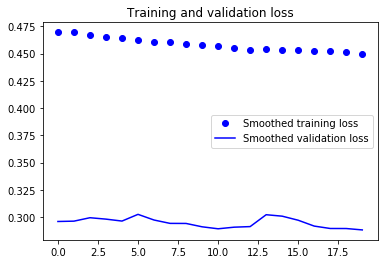

In [8]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
model.save('baby_550')

In [15]:
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
model = load_model('baby_550')

test_dir = 'downloads/baby/test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=50,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=68)
print('test loss:', test_loss)
print('test acc:', test_acc)

Found 3400 images belonging to 2 classes.
test loss: 0.28147747696322556
test acc: 0.873529406154857
